In [9]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as mcolors


In [11]:
def get_team_logo(team_abbr):
    current_dir = os.getcwd()
    logo_dir = os.path.join(current_dir,'logos')
    file_path = os.path.join(logo_dir,team_abbr+'.png')
    return file_path

def interpolate_color(low_color, high_color, val, min_val, max_val):
    fraction = (val - min_val) / (max_val - min_val)
    low_color_rgba = np.array(mcolors.to_rgba(low_color))
    high_color_rgba = np.array(mcolors.to_rgba(high_color))
    color = low_color_rgba * (1 - fraction) + high_color_rgba * fraction
    return mcolors.to_hex(color)

In [12]:
file_path = '2023/plots/stats'
csv_files = [f for f in os.listdir(file_path) if f.endswith('.csv')]

dataframes = {}

for csv in csv_files:
    full_path = os.path.join(file_path, csv)
    df_name = os.path.splitext(csv)[0]  
    dataframes[df_name] = pd.read_csv(full_path)
    print(f"Loaded {df_name} with {len(dataframes[df_name])} rows")

Loaded kick_df1 with 50 rows
Loaded output with 32 rows
Loaded passing_df with 32 rows
Loaded passing_of with 32 rows
Loaded pass_df with 100 rows
Loaded rec_df with 100 rows
Loaded rec_rec_per_gp_df with 100 rows
Loaded rushing_df with 32 rows
Loaded rushing_of with 32 rows
Loaded rush_df with 100 rows
Loaded rush_yd_per_gp_df with 100 rows
Loaded score_df with 150 rows


In [14]:
passing_of = dataframes['passing_of']
rushing_of = dataframes['rushing_of']


In [17]:
passing_def = dataframes['passing_df']

In [18]:
rushing_def = dataframes['rushing_df']

In [20]:
total_defense = pd.merge(passing_def, rushing_def, on='Team')


In [21]:
total_defense.columns

Index(['Team', 'Att_x', 'Cmp', 'Cmp %', 'Yds/Att', 'Yds', 'TD_x', 'INT',
       'Rate', '1st', '1st%', '20+_x', '40+_x', 'Lng_x', 'Sck', 'Att_y',
       'Rush Yds', 'YPC', 'TD_y', '20+_y', '40+_y', 'Lng_y', 'Rush 1st',
       'Rush 1st%', 'Rush FUM'],
      dtype='object')

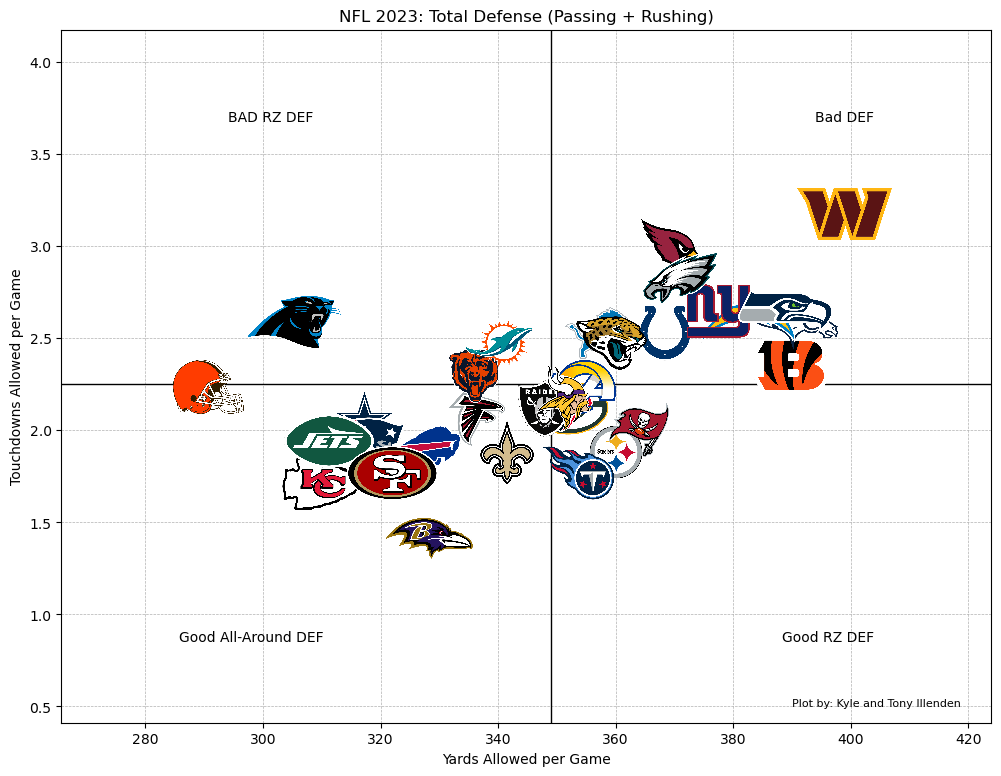

In [23]:
total_defense['TYDS/G'] = (total_defense['Yds'].astype('float') + total_defense['Rush Yds'].astype('float')) / 17
total_defense['TDs/G'] = (total_defense['TD_x'].astype('float') + total_defense['TD_y'].astype('float')) / 17

fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(total_defense['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (total_defense['TYDS/G'][i], total_defense['TDs/G'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = total_defense['TYDS/G'].mean()
y_mean = total_defense['TDs/G'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
ax.text(x_mean + 55, total_defense['TDs/G'].max() + 0.5, 'Bad DEF', color='black', horizontalalignment='right')
ax.text(x_mean - 55, total_defense['TDs/G'].max() + 0.5, 'BAD RZ DEF', color='black', horizontalalignment='left')
ax.text(total_defense['TYDS/G'].min() - 5, total_defense['TDs/G'].min() - 0.5, 'Good All-Around DEF', color='black', horizontalalignment='left', verticalalignment='top')
ax.text(total_defense['TYDS/G'].max() + 5, total_defense['TDs/G'].min() - 0.5, 'Good RZ DEF', color='black', verticalalignment='top', horizontalalignment='right')

ax.set_xlabel('Yards Allowed per Game')
ax.set_ylabel('Touchdowns Allowed per Game')
ax.set_title('NFL 2023: Total Defense (Passing + Rushing)')
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')
plt.xlim(total_defense['TYDS/G'].min() - 25, total_defense['TYDS/G'].max() + 25)
plt.ylim(total_defense['TDs/G'].min() - 1, total_defense['TDs/G'].max() + 1)
#plt.savefig('logos.png', dpi=450)
ax.text(390, 0.5, 'Plot by: Kyle and Tony Illenden', color='black', fontsize=8)
plt.show()

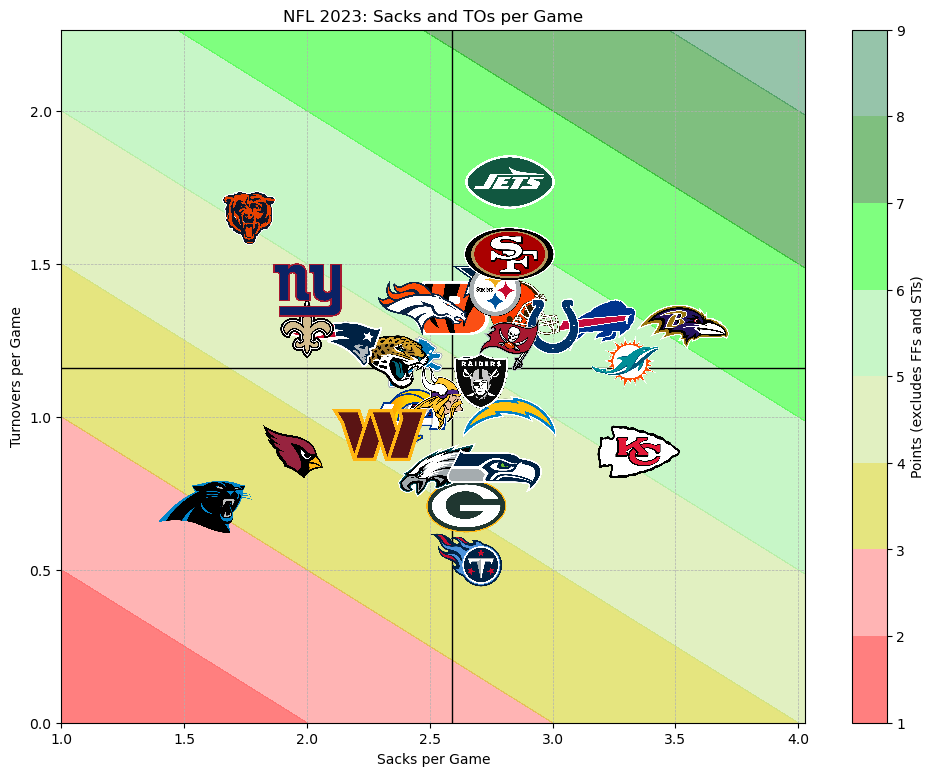

In [24]:
total_defense['TOs/G'] = (total_defense['INT'].astype('float') + total_defense['Rush FUM'].astype('float')) / 17
total_defense['Sck/G'] = total_defense['Sck'].astype('float') / 17

x = np.linspace(total_defense['Sck/G'].min() - 1, total_defense['Sck/G'].max() + 1, 100)
y = np.linspace(total_defense['TOs/G'].min() - 1, total_defense['TOs/G'].max() + 1, 100)
X, Y = np.meshgrid(x, y)
Z = 2 * Y + X

colors = [
    "#FF0000",  # Pure Red
    "#FF6B6B",  # Light Red
    "#CCCC00",  # Olive Yellow
    "#C5E384",  # Gold (Variant of Yellow, kept for comparison)
    "#90EE90",  # Light Green
    "#00FF00", 
    "#008000",
    "seagreen" 
]

fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(total_defense['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (total_defense['Sck/G'][i], total_defense['TOs/G'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = total_defense['Sck/G'].mean()
y_mean = total_defense['TOs/G'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
cf = ax.contourf(X, Y, Z, levels=np.arange(1, 9.1, 1), colors=colors, alpha=0.5)
plt.colorbar(cf, ax=ax, label='Points (excludes FFs and STs)', orientation='vertical')


ax.set_xlabel('Sacks per Game')
ax.set_ylabel('Turnovers per Game')
ax.set_title('NFL 2023: Sacks and TOs per Game')
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')

plt.xlim(1, total_defense['Sck/G'].max() + 0.5)
plt.ylim(0, total_defense['TOs/G'].max() + 0.5)
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')
#plt.savefig('logos.png', dpi=450)
plt.show()

In [25]:
rec_df = dataframes['rec_df']

In [27]:
rec_df['REC/GP'] = rec_df['REC/GP'].astype('float')
rec_df['YDS/G'] = rec_df['YDS/G'].astype('float')

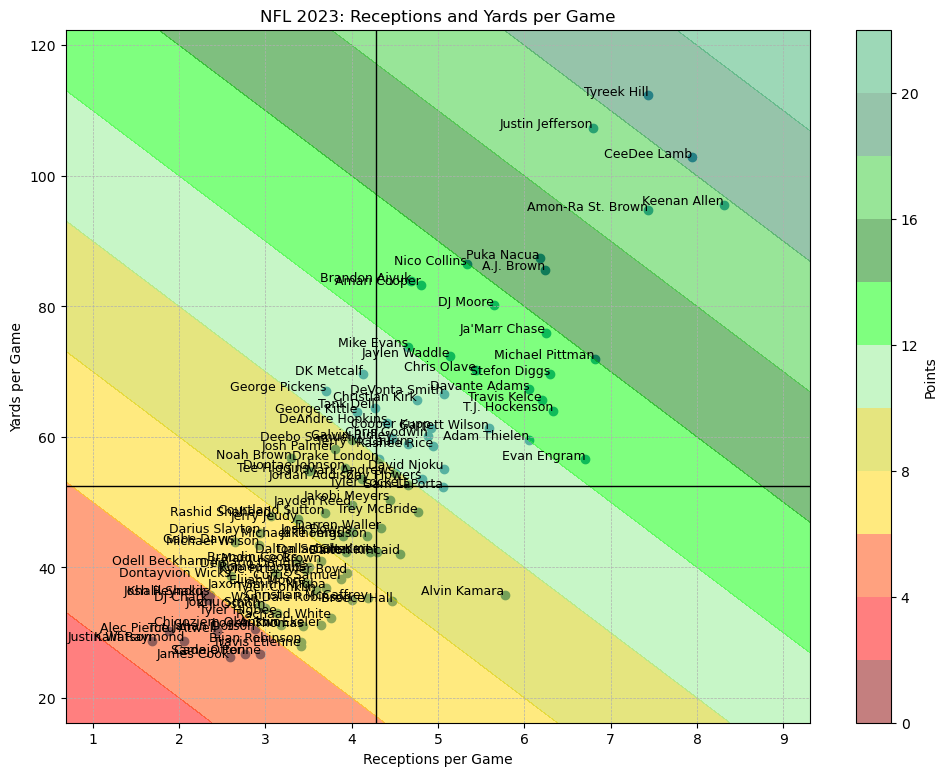

In [28]:
x = np.linspace(rec_df['REC/GP'].min() - 1, rec_df['REC/GP'].max() + 1, 100)
y = np.linspace(rec_df['YDS/G'].min() - 10, rec_df['YDS/G'].max() + 10, 100)
X, Y = np.meshgrid(x, y)
Z = X + (Y * 0.1)

colors = [
    "darkred",
    "#FF0000",  # Pure Red
    "#FF4500",  # OrangeRed, variant of red
    "#FFD700",  # Gold, bright yellow
    "#CCCC00",  # Olive Yellow
    "#90EE90",  # Light Green
    "#00FF00",  # Lime, pure green
    "#008000",  # Green, dark green
    "#32CD32",  # LimeGreen, variant of green
    "seagreen",  # Sea Green
    "#3cb371"
]

fig, ax = plt.subplots(figsize=(12, 9))

plt.scatter(rec_df['REC/GP'], rec_df['YDS/G'])

for index, row in rec_df.iterrows():
    plt.text(row['REC/GP'], row['YDS/G'], row['Player'], fontsize=9, ha='right')


x_mean = rec_df['REC/GP'].mean()
y_mean = rec_df['YDS/G'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)

plt.contourf(X, Y, Z, levels=np.arange(0, 24, 2), colors=colors, alpha=0.5)
plt.colorbar(label='Points', orientation='vertical')

ax.set_xlabel('Receptions per Game')
ax.set_ylabel('Yards per Game')
ax.set_title('NFL 2023: Receptions and Yards per Game')
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')

#plt.xlim(total_defense['TYDS/G'].min() - 25, total_defense['TYDS/G'].max() + 25)
plt.ylim(rec_df['YDS/G'].min() - 10, rec_df['YDS/G'].max() + 10)
plt.yticks = np.arange(rec_df['YDS/G'].min() - 10, rec_df['YDS/G'].max() + 10, 10)
#plt.savefig('logos.png', dpi=450)
plt.show()

In [29]:
passing_of['PASS_YPP'] = passing_of['Pass Yds'].astype('float') / passing_of['Att'].astype('float')
rushing_of['RUSH_YPP'] = rushing_of['Rush Yds'].astype('float') / rushing_of['Att'].astype('float')

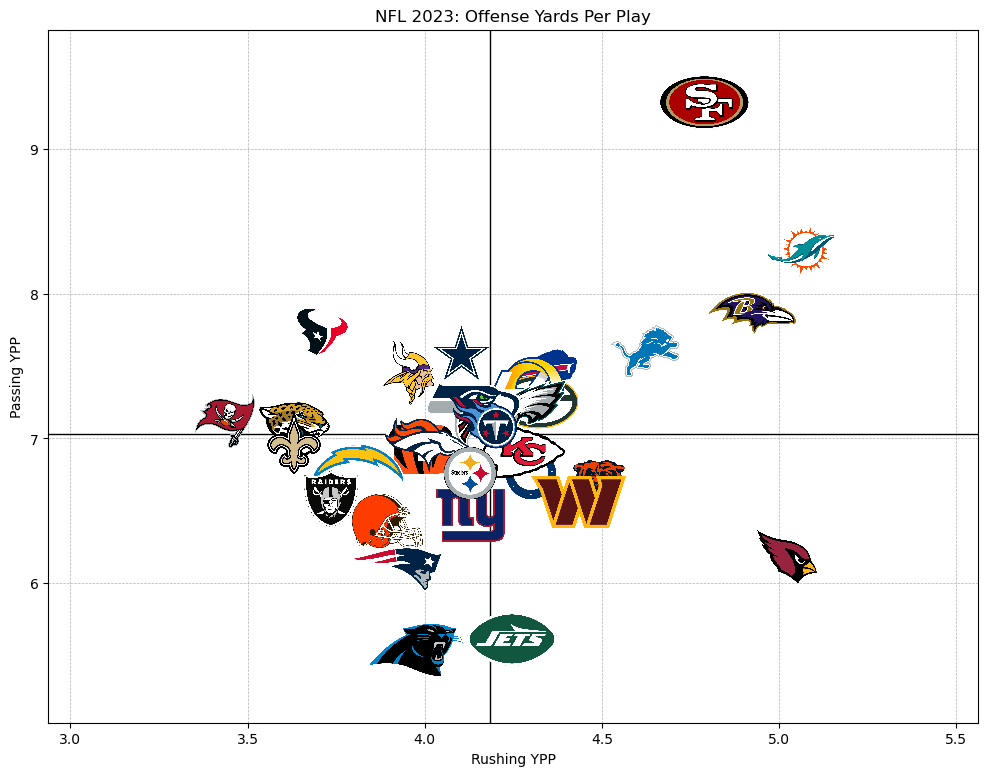

In [30]:
fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(passing_of['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (rushing_of['RUSH_YPP'][i], passing_of['PASS_YPP'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = rushing_of['RUSH_YPP'].mean()
y_mean = passing_of['PASS_YPP'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
#ax.text(x_mean + 1.25, passing_of['PASS_YPP'].max() + 0.5, 'Efficent Pass and Run', color='black', horizontalalignment='right')
#ax.text(x_mean - 55, passing_of['PASS_YPP'].max() + 0.5, 'BAD RZ DEF', color='black', horizontalalignment='left')
#ax.text(total_defense['TYDS/G'].min() - 5, total_defense['TDs/G'].min() - 0.5, 'Good All-Around DEF', color='black', horizontalalignment='left', verticalalignment='top')
#ax.text(total_defense['TYDS/G'].max() + 5, total_defense['TDs/G'].min() - 0.5, 'Good RZ DEF', color='black', verticalalignment='top', horizontalalignment='right')

ax.set_xlabel('Rushing YPP')
ax.set_ylabel('Passing YPP')
ax.set_title('NFL 2023: Offense Yards Per Play')
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')
plt.xlim(rushing_of['RUSH_YPP'].min() - 0.5, rushing_of['RUSH_YPP'].max() + 0.5)
plt.ylim(passing_of['PASS_YPP'].min() - 0.5, passing_of['PASS_YPP'].max() + 0.5)
#plt.savefig('logos.png', dpi=450)
#ax.text(390, 0.5, 'Plot by: Kyle and Tony Illenden', color='black', fontsize=8)
plt.show()

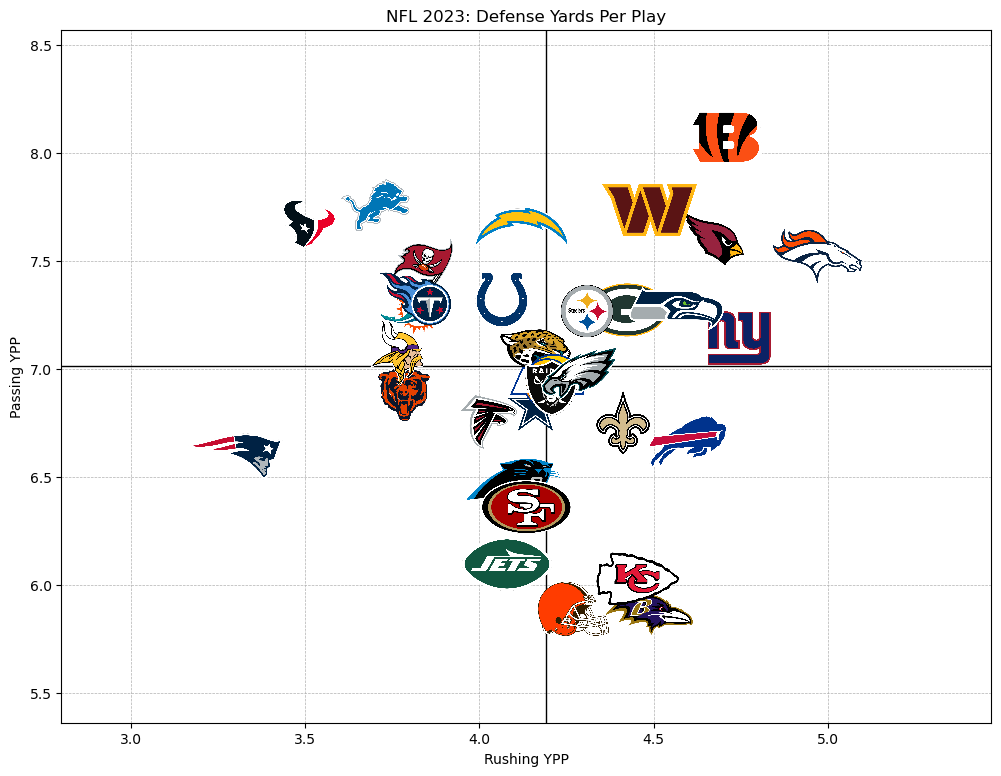

In [32]:
passing_def['PASS_YPP'] = passing_def['Yds'].astype('float') / passing_def['Att'].astype('float')
rushing_def['RUSH_YPP'] = rushing_def['Rush Yds'].astype('float') / rushing_def['Att'].astype('float')

fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(passing_of['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (rushing_def['RUSH_YPP'][i], passing_def['PASS_YPP'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = rushing_def['RUSH_YPP'].mean()
y_mean = passing_def['PASS_YPP'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
#ax.text(x_mean + 1.25, passing_of['PASS_YPP'].max() + 0.5, 'Efficent Pass and Run', color='black', horizontalalignment='right')
#ax.text(x_mean - 55, passing_of['PASS_YPP'].max() + 0.5, 'BAD RZ DEF', color='black', horizontalalignment='left')
#ax.text(total_defense['TYDS/G'].min() - 5, total_defense['TDs/G'].min() - 0.5, 'Good All-Around DEF', color='black', horizontalalignment='left', verticalalignment='top')
#ax.text(total_defense['TYDS/G'].max() + 5, total_defense['TDs/G'].min() - 0.5, 'Good RZ DEF', color='black', verticalalignment='top', horizontalalignment='right')
#C:\Users\Tony\OneDrive - University of Oklahoma\Documents\GitHub\NFL_stats\defensive_ypp.png
ax.set_xlabel('Rushing YPP')
ax.set_ylabel('Passing YPP')
ax.set_title('NFL 2023: Defense Yards Per Play')
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')
plt.xlim(rushing_def['RUSH_YPP'].min() - 0.5, rushing_def['RUSH_YPP'].max() + 0.5)
plt.ylim(passing_def['PASS_YPP'].min() - 0.5, passing_def['PASS_YPP'].max() + 0.5)
plt.savefig('defensive_ypp.png', dpi=450, bbox_inches='tight')
#ax.text(390, 0.5, 'Plot by: Kyle and Tony Illenden', color='black', fontsize=8)
plt.show()

In [162]:
total_offense['YPP'] = (total_offense['Pass Yds'].astype('float') + total_offense['Rush Yds'].astype('float')) / (total_offense['Att_x'].astype('float') + total_offense['Att_y'].astype('float'))
total_defense['YPP'] = (total_defense['Yds'].astype('float') + total_defense['Rush Yds'].astype('float')) / (total_defense['Att_x'].astype('float') + total_defense['Att_y'].astype('float'))

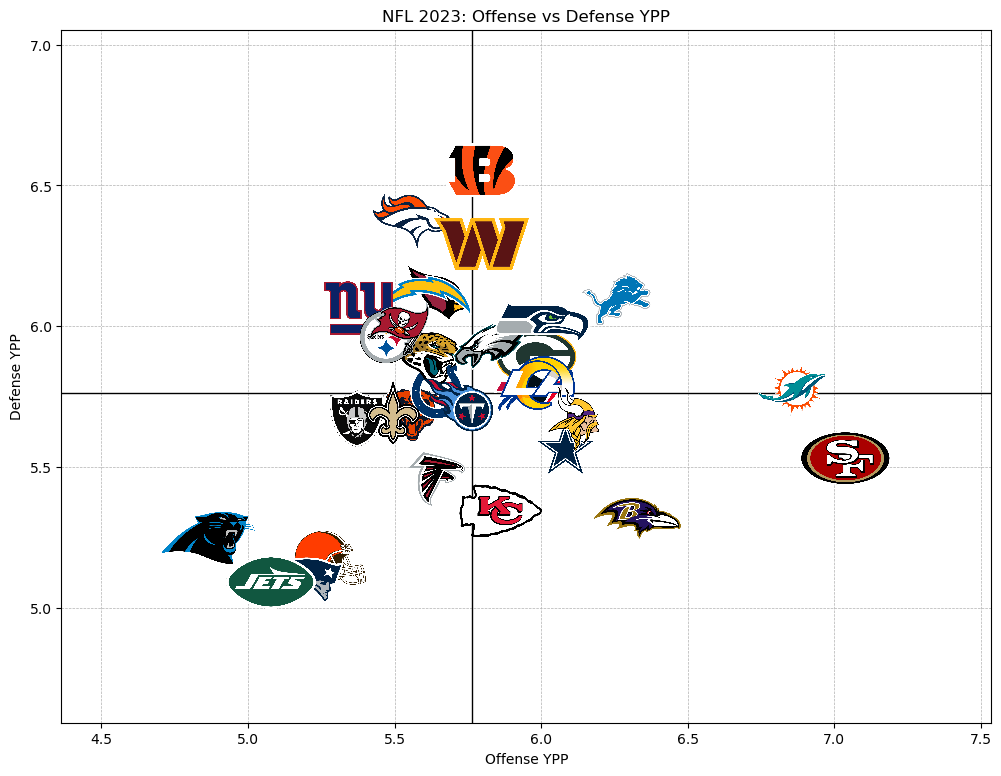

In [171]:
fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(total_offense['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (total_offense['YPP'][i], total_defense['YPP'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = total_offense['YPP'].mean()
y_mean = total_defense['YPP'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
#ax.text(x_mean + 1.25, passing_of['PASS_YPP'].max() + 0.5, 'Efficent Pass and Run', color='black', horizontalalignment='right')
#ax.text(x_mean - 55, passing_of['PASS_YPP'].max() + 0.5, 'BAD RZ DEF', color='black', horizontalalignment='left')
#ax.text(total_defense['TYDS/G'].min() - 5, total_defense['TDs/G'].min() - 0.5, 'Good All-Around DEF', color='black', horizontalalignment='left', verticalalignment='top')
#ax.text(total_defense['TYDS/G'].max() + 5, total_defense['TDs/G'].min() - 0.5, 'Good RZ DEF', color='black', verticalalignment='top', horizontalalignment='right')

ax.set_xlabel('Offense YPP')
ax.set_ylabel('Defense YPP')
ax.set_title('NFL 2023: Offense vs Defense YPP')
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')
plt.xlim(total_offense['YPP'].min() - 0.5, total_offense['YPP'].max() + 0.5)
plt.ylim(total_defense['YPP'].min() - 0.5, total_defense['YPP'].max() + 0.5)
plt.savefig('off_def_ypp.png', dpi=450)
#ax.text(390, 0.5, 'Plot by: Kyle and Tony Illenden', color='black', fontsize=8)
plt.show()

In [16]:
passing_of = dataframes['passing_of']
rushing_of = dataframes['rushing_of']

In [17]:
total_offense = pd.merge(passing_of, rushing_of, on='Team')

In [18]:
total_offense['TYDS/G'] = (total_offense['Pass Yds'].astype('float') + total_offense['Rush Yds'].astype('float')) / 17
total_offense['TDs/G'] = (total_offense['TD_x'].astype('float') + total_offense['TD_y'].astype('float')) / 17

In [19]:
x = total_offense['TYDS/G']
y = total_offense['TDs/G']
N = len(x)
x_sum = np.sum(x)
y_sum = np.sum(y)
xy_sum = np.sum(x*y)
x2_sum = np.sum(x**2)
y2_sum = np.sum(y**2)

slope = (N*xy_sum - x_sum*y_sum) / (N*x2_sum - x_sum**2)
intercept = (y_sum - slope*x_sum) / N

# Calculate correlation coefficient
r_num = N*xy_sum - x_sum*y_sum
r_den = np.sqrt((N*x2_sum - x_sum**2) * (N*y2_sum - y_sum**2))
r = r_num / r_den

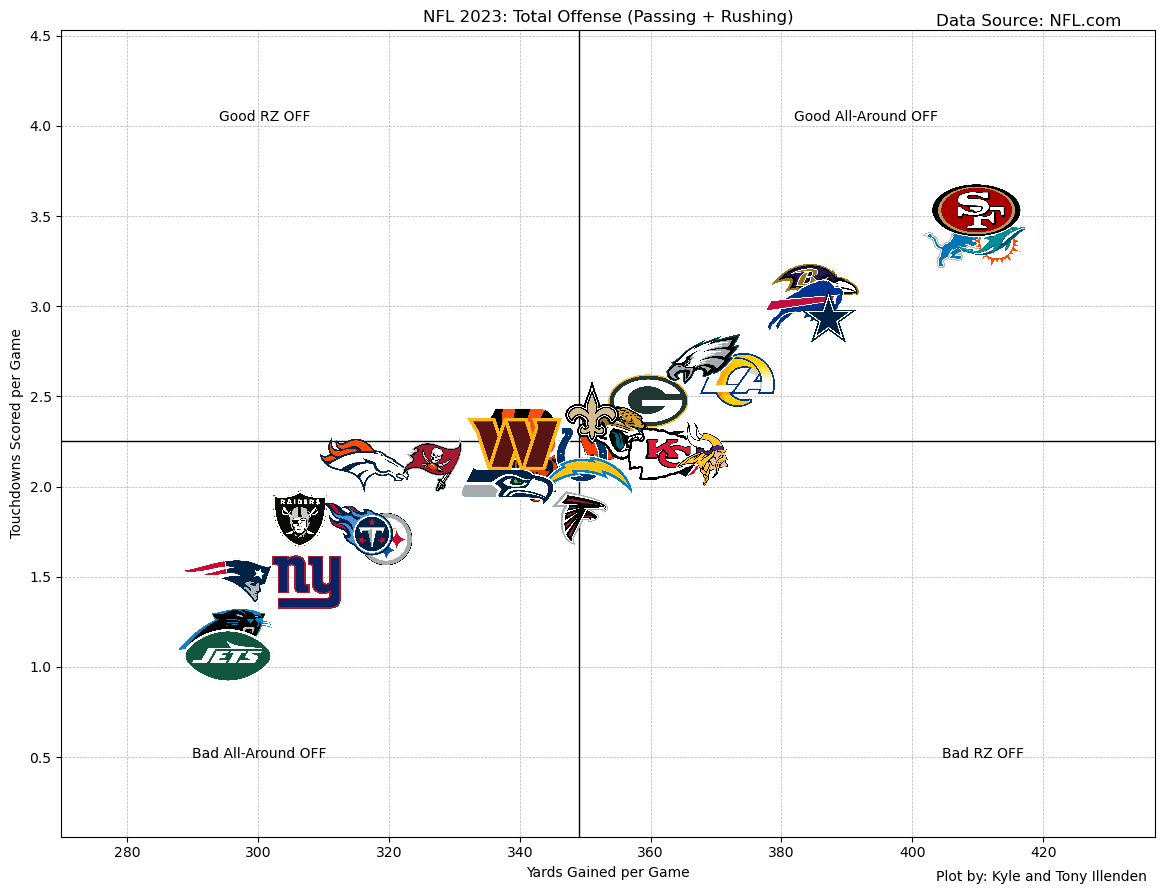

In [20]:
fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(total_offense['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (total_offense['TYDS/G'][i], total_offense['TDs/G'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = total_offense['TYDS/G'].mean()
y_mean = total_offense['TDs/G'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
ax.text(x_mean + 55, total_offense['TDs/G'].max() + 0.5, 'Good All-Around OFF', color='black', horizontalalignment='right')
ax.text(x_mean - 55, total_offense['TDs/G'].max() + 0.5, 'Good RZ OFF', color='black', horizontalalignment='left')
ax.text(total_offense['TYDS/G'].min() - 5, total_offense['TDs/G'].min() - 0.5, 'Bad All-Around OFF', color='black', horizontalalignment='left', verticalalignment='top')
ax.text(total_offense['TYDS/G'].max() + 5, total_offense['TDs/G'].min() - 0.5, 'Bad RZ OFF', color='black', verticalalignment='top', horizontalalignment='right')



ax.set_xlabel('Yards Gained per Game')
ax.set_ylabel('Touchdowns Scored per Game')
ax.set_title('NFL 2023: Total Offense (Passing + Rushing)')
ax.grid(True, which='both', axis='both', linewidth=0.5, linestyle='--')
plt.xlim(total_offense['TYDS/G'].min() - 25, total_offense['TYDS/G'].max() + 25)
plt.ylim(total_offense['TDs/G'].min() - 1, total_offense['TDs/G'].max() + 1)
#plt.savefig('logos.png', dpi=450)
#ax.text(400, 0.25, 'Plot by: Kyle and Tony Illenden', color='black', fontsize=8)
ax.text(0.80, -0.055, 'Plot by: Kyle and Tony Illenden', color='black', fontsize=10, transform=ax.transAxes)
ax.text(0.80, 1.005, 'Data Source: NFL.com', color='black', fontsize=12, transform=ax.transAxes)

plt.tight_layout()
plt.show()

In [22]:
passing_of

,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,ARI,555,355,64.0,6.2,3430,18,12,82.9,173,31.2,38,3,69T,42,286
1,ATL,530,327,61.7,7.1,3775,17,17,80.5,181,34.2,46,10,75,40,251
2,BAL,494,328,66.4,7.9,3881,27,7,102.5,180,36.4,52,9,80T,41,246
3,BUF,579,385,66.5,7.4,4306,29,18,92.2,199,34.4,49,9,81T,24,152
4,CAR,586,350,59.7,5.5,3245,13,10,75.2,150,25.6,31,5,48T,65,504
5,CHI,513,321,62.6,6.7,3421,19,15,82.2,169,32.9,48,5,58,50,325
6,CIN,615,420,68.3,6.9,4257,27,14,93.0,208,33.8,46,10,80,50,362
7,CLE,624,355,56.9,6.4,4011,24,23,73.7,173,27.7,53,15,75,45,318
8,DAL,614,428,69.7,7.6,4660,36,10,104.6,229,37.3,64,7,92T,40,263
9,DEN,513,337,65.7,7.0,3566,28,9,96.7,154,30.0,44,13,60,52,304


In [28]:
testing = pd.read_html('https://www.foxsports.com/nfl/dak-prescott-player-game-log?season=2023')

In [29]:
dak_columns = testing[0].columns

In [30]:
dak_data = testing[-1]

In [31]:
dak_data.columns = dak_columns

In [32]:
dak_data

,GAME,GAME.1,GS,COMP,PATT,PCT,PYDS,PAVG,PTD,PASS INT,SCK,SCKYDS,RATT,RYDS,RAVG,RTD,FUM
0,1/14,GB L,-,41,60,68.3,403,6.7,3,2,4,16,6,45,7.5,0,0
1,1/7,@WAS W,-,31,36,86.1,279,7.8,4,1,0,0,0,0,-,0,0
2,12/30,DET W,-,26,38,68.4,345,9.1,2,1,3,22,2,5,2.5,0,1
3,12/24,@MIA L,-,20,32,62.5,253,7.9,2,0,4,11,5,25,5.0,0,1
4,12/17,@BUF L,-,21,34,61.8,134,3.9,0,1,3,28,4,27,6.8,0,0
5,12/10,PHI W,-,24,39,61.5,271,6.9,2,0,3,15,3,11,3.7,0,1
6,11/30,SEA W,-,29,41,70.7,299,7.3,3,0,4,24,7,23,3.3,0,0
7,11/23,WAS W,-,22,32,68.8,331,10.3,4,0,0,0,1,10,10.0,0,0
8,11/19,@CAR W,-,25,38,65.8,189,5.0,2,0,0,0,2,6,3.0,0,0
9,11/12,NYG W,-,26,35,74.3,404,11.5,4,1,0,0,2,17,8.5,1,0


In [33]:
dak_data['PTS'] = (dak_data['PYDS'].astype('float')*0.04) + (dak_data['PTD'].astype('float')*4) + (dak_data['RYDS'].astype('float')*0.1) + (dak_data['RTD'].astype('int')*6) - (dak_data['PASS INT'].astype('float')) - (dak_data['FUM'].astype('float')*2)

In [34]:
dak_data

,GAME,GAME.1,GS,COMP,PATT,PCT,PYDS,PAVG,PTD,PASS INT,SCK,SCKYDS,RATT,RYDS,RAVG,RTD,FUM,PTS
0,1/14,GB L,-,41,60,68.3,403,6.7,3,2,4,16,6,45,7.5,0,0,30.62
1,1/7,@WAS W,-,31,36,86.1,279,7.8,4,1,0,0,0,0,-,0,0,26.16
2,12/30,DET W,-,26,38,68.4,345,9.1,2,1,3,22,2,5,2.5,0,1,19.30
3,12/24,@MIA L,-,20,32,62.5,253,7.9,2,0,4,11,5,25,5.0,0,1,18.62
4,12/17,@BUF L,-,21,34,61.8,134,3.9,0,1,3,28,4,27,6.8,0,0,7.06
5,12/10,PHI W,-,24,39,61.5,271,6.9,2,0,3,15,3,11,3.7,0,1,17.94
6,11/30,SEA W,-,29,41,70.7,299,7.3,3,0,4,24,7,23,3.3,0,0,26.26
7,11/23,WAS W,-,22,32,68.8,331,10.3,4,0,0,0,1,10,10.0,0,0,30.24
8,11/19,@CAR W,-,25,38,65.8,189,5.0,2,0,0,0,2,6,3.0,0,0,16.16
9,11/12,NYG W,-,26,35,74.3,404,11.5,4,1,0,0,2,17,8.5,1,0,38.86


In [35]:
dak_data['RoC'] = dak_data['PTS'].diff() / 1 

In [37]:
pass_df = dataframes['pass_df']

In [38]:
filtered_df = pass_df[(pass_df['ATT'].astype(float) > 50) & (pass_df['GP'].astype(float) > 10)]

In [39]:
player_names_list = filtered_df['Player'].tolist()

In [56]:
player_dfs = {}  # Initialize an empty dictionary to store DataFrames

for full_name in player_names_list:
    first_name, last_name = full_name.split()[:2] 
    first_name = first_name.replace('.', '')  
    last_name = last_name.replace("'", "") 
    
    # Define the URLs list
    if full_name == "Josh Allen":
        urls = [
            f'https://www.foxsports.com/nfl/{first_name.lower()}-{last_name.lower()}-2-player-game-log?season=2023'
        ]
    else:
        urls = [
            f'https://www.foxsports.com/nfl/{first_name.lower()}-{last_name.lower()}-player-game-log?season=2023',
            f'https://www.foxsports.com/nfl/{first_name.lower()}-{last_name.lower()}-ii-player-game-log?season=2023'
        ]

    for url in urls:
        try:
            testing = pd.read_html(url)
            # If data is successfully fetched, break out of the inner loop
            break
        except ValueError as e:
            print(f"Could not fetch data for {full_name} using URL {url}: {e}")
            continue
    else:
        # If all URLs fail, skip to the next player
        print(f"Failed to fetch data for {full_name} with all URLs.")
        continue
    
    game_log_columns = testing[0].columns
    game_log_data = testing[-1]
    game_log_data.columns = game_log_columns
    
    columns_to_convert = ['PYDS', 'PTD', 'RYDS', 'RTD', 'PASS INT', 'FUM']
    for col in columns_to_convert:
        if col not in game_log_data.columns:
            game_log_data[col] = 0  # Initialize missing column with 0
        else:
            game_log_data[col] = game_log_data[col].replace('-', 0).astype('float')
    
    # Calculate the points
    game_log_data['PTS'] = (game_log_data['PYDS']*0.04) + (game_log_data['PTD']*4) + \
                           (game_log_data['RYDS']*0.1) + (game_log_data['RTD']*6) - \
                           (game_log_data['PASS INT']) - (game_log_data['FUM']*2)
    
    # Create a DataFrame for this player
    player_df = game_log_data[['PTS']]
    
    # Rename the columns to include the game number for clarity
    player_df.columns = [f'Game {i+1}' for i in range(len(player_df.columns))]
    
    # Store the DataFrame in the dictionary
    player_dfs[full_name] = player_df


Could not fetch data for Patrick Mahomes using URL https://www.foxsports.com/nfl/patrick-mahomes-player-game-log?season=2023: No tables found


In [52]:
player_dfs[full_name]

,Game 1
0,16.68
1,17.76
2,10.42
3,0.52
4,1.62
5,21.66
6,8.40
7,4.84
8,0.20
9,0.24


In [57]:
dfs_with_names = []

for player_name, df in player_dfs.items():
    # Assuming the DataFrame has a single column for points, rename it to the player's name
    df_renamed = df.rename(columns={df.columns[0]: player_name})
    # Add the player's DataFrame to the list
    dfs_with_names.append(df_renamed)

# Concatenate all player DataFrames along the columns
all_players_df = pd.concat(dfs_with_names, axis=1)

all_players_df = all_players_df.round(1)

# Step 2: Display as Table
# Use pandas styling to display the DataFrame as a table, this is just for visualization and won't create an actual UI element
display(all_players_df.style.set_table_styles([{'selector': '','props': [('border', '1px solid black')]}]).set_properties(**{'border': '1px solid black'}))

,Tua Tagovailoa,Jared Goff,Dak Prescott,Josh Allen,Brock Purdy,Patrick Mahomes,Jordan Love,C.J. Stroud,Baker Mayfield,Trevor Lawrence,Matthew Stafford,Sam Howell,Derek Carr,Jalen Hurts,Lamar Jackson,Geno Smith,Gardner Minshew,Justin Herbert,Russell Wilson,Bryce Young,Desmond Ridder,Justin Fields,Joshua Dobbs,Zach Wilson,Aidan O'Connell,Mac Jones,Kenny Pickett,Tyrod Taylor
0,13.500000,14.900000,30.600000,28.600000,15.400000,22.900000,12.100000,7.900000,25.500000,18.200000,22.700000,8.000000,25.200000,14.500000,17.300000,18.400000,6.500000,2.800000,15.500000,4.200000,16.600000,8.600000,4.600000,0.000000,17.900000,-0.400000,1.100000,16.700000
1,9.600000,20.100000,26.200000,33.500000,18.500000,15.100000,22.800000,23.100000,27.100000,9.300000,14.600000,8.700000,15.600000,1.600000,36.100000,16.900000,13.300000,8.000000,17.500000,3.700000,-0.300000,23.200000,8.500000,-1.000000,20.300000,8.300000,11.600000,17.800000
2,16.900000,12.800000,19.300000,25.100000,15.500000,18.500000,18.500000,20.600000,6.200000,14.700000,20.700000,0.200000,24.000000,20.200000,36.300000,15.300000,10.100000,14.400000,16.500000,20.200000,6.900000,25.500000,13.900000,19.200000,2.100000,12.100000,5.100000,10.400000
3,13.500000,20.800000,18.600000,18.200000,17.600000,18.600000,28.400000,12.900000,18.300000,20.400000,18.500000,9.300000,20.300000,22.400000,22.600000,31.000000,20.600000,23.700000,18.800000,5.600000,20.400000,7.600000,25.100000,7.700000,25.900000,13.200000,6.600000,0.500000
4,13.000000,12.800000,7.100000,26.000000,6.400000,12.000000,24.000000,1.600000,19.800000,23.100000,23.700000,18.200000,11.800000,23.900000,19.500000,8.300000,13.100000,29.400000,14.800000,7.500000,6.800000,24.700000,20.900000,12.900000,6.000000,20.000000,10.300000,1.600000
5,7.100000,14.300000,17.900000,16.200000,25.700000,15.700000,17.500000,14.100000,29.000000,23.600000,23.000000,18.300000,9.900000,8.900000,30.600000,13.200000,16.700000,5.100000,14.500000,4.100000,11.700000,10.600000,20.900000,5.200000,13.900000,6.900000,1.900000,21.700000
6,19.200000,31.100000,26.300000,21.500000,22.400000,17.700000,9.900000,30.900000,18.100000,32.200000,24.400000,20.700000,9.900000,21.900000,13.000000,24.100000,13.600000,24.000000,18.700000,8.100000,8.700000,19.200000,14.100000,12.100000,12.100000,0.400000,15.200000,8.400000
7,9.800000,6.400000,30.200000,40.700000,29.500000,14.600000,23.700000,18.300000,10.900000,4.100000,10.700000,24.200000,3.400000,35.500000,24.000000,3.700000,6.700000,12.900000,15.600000,6.200000,3.400000,5.900000,11.100000,8.900000,7.400000,2.700000,12.400000,4.800000
8,18.600000,16.300000,16.200000,23.500000,11.500000,14.000000,26.600000,20.000000,12.400000,15.700000,10.400000,18.700000,16.700000,17.900000,15.000000,13.900000,9.600000,18.100000,13.900000,9.200000,13.800000,33.000000,10.700000,5.600000,8.400000,13.300000,4.500000,0.200000
9,10.400000,16.200000,38.900000,14.400000,26.700000,20.800000,16.900000,37.800000,11.300000,18.100000,13.000000,30.000000,18.300000,23.900000,9.500000,14.800000,15.800000,24.400000,8.900000,12.000000,19.100000,28.900000,21.400000,17.200000,6.000000,14.700000,18.500000,0.200000


Text(0.5, 1.0, '2023 NFL Season: QBs Weekly Points')

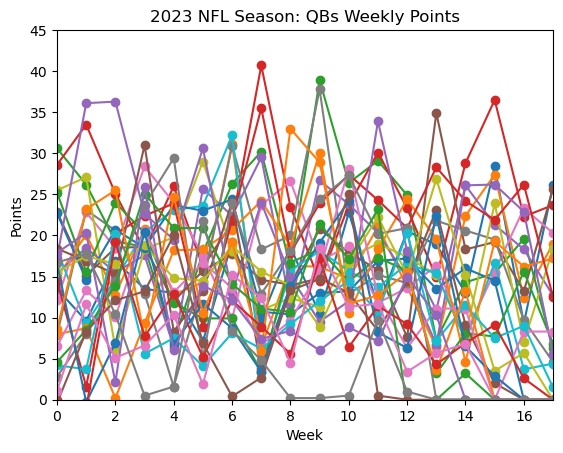

In [74]:
plt.plot(all_players_df.index, all_players_df.loc[0:23], marker='o')
plt.xlim(0, 17)
plt.ylim(0, 45)
plt.xlabel('Week')
plt.ylabel('Points')
plt.title('2023 NFL Season: QBs Weekly Points')

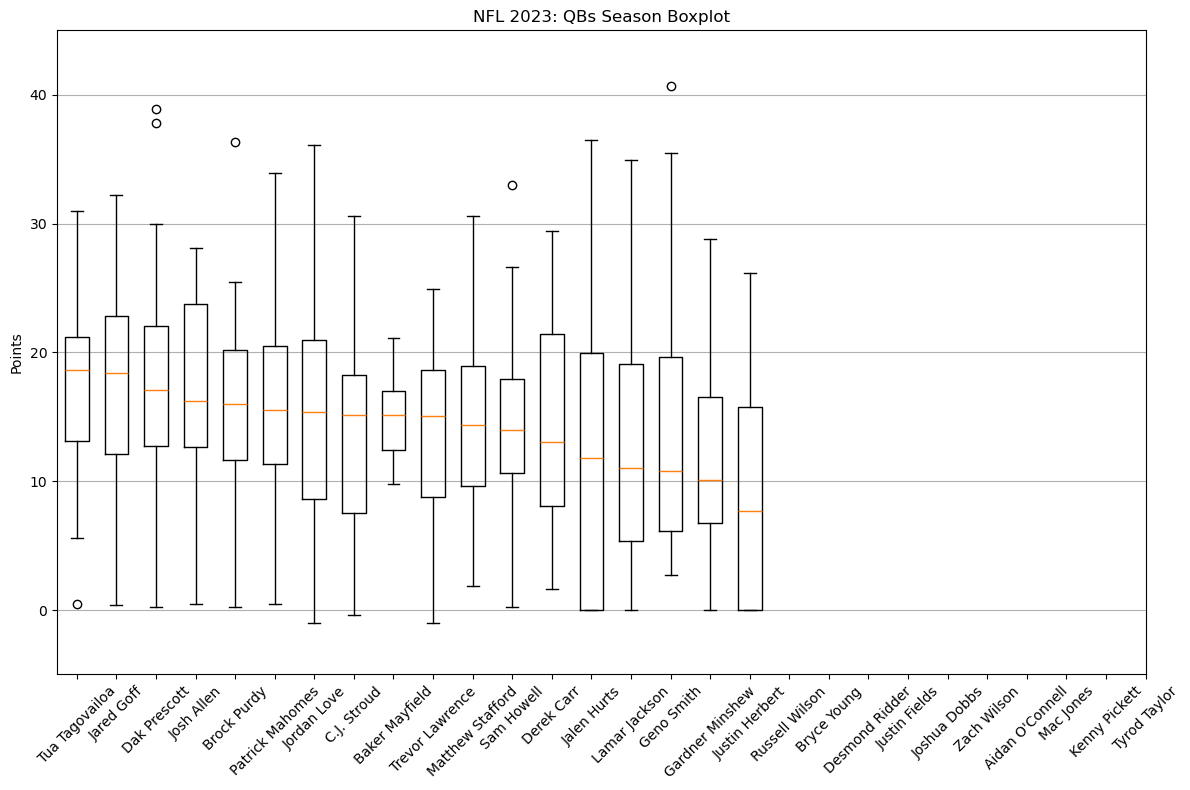

In [129]:
medians = new_df.median()

# Filter out columns where the median score is less than 5
filtered_columns = medians[medians >= 5].sort_values(ascending=False).index.tolist()

# Sort 'new_df' columns based on the median values in descending order
sorted_columns = medians.index.tolist()

# Reorder 'data_to_plot' based on the sorted columns
data_to_plot = [new_df[col].dropna().tolist() for col in filtered_columns]

# Reorder 'player_names' based on the sorted columns
player_names = medians.index.tolist()

# Plotting
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, widths=0.6)

# Set x-ticks labels to sorted player names
player_names_string = new_df.index.tolist()
plt.xticks(range(1, len(player_names_string) + 1), player_names_string, rotation=45)
plt.ylabel('Points')
plt.title('NFL 2023: QBs Season Boxplot')
plt.ylim(-5, 45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

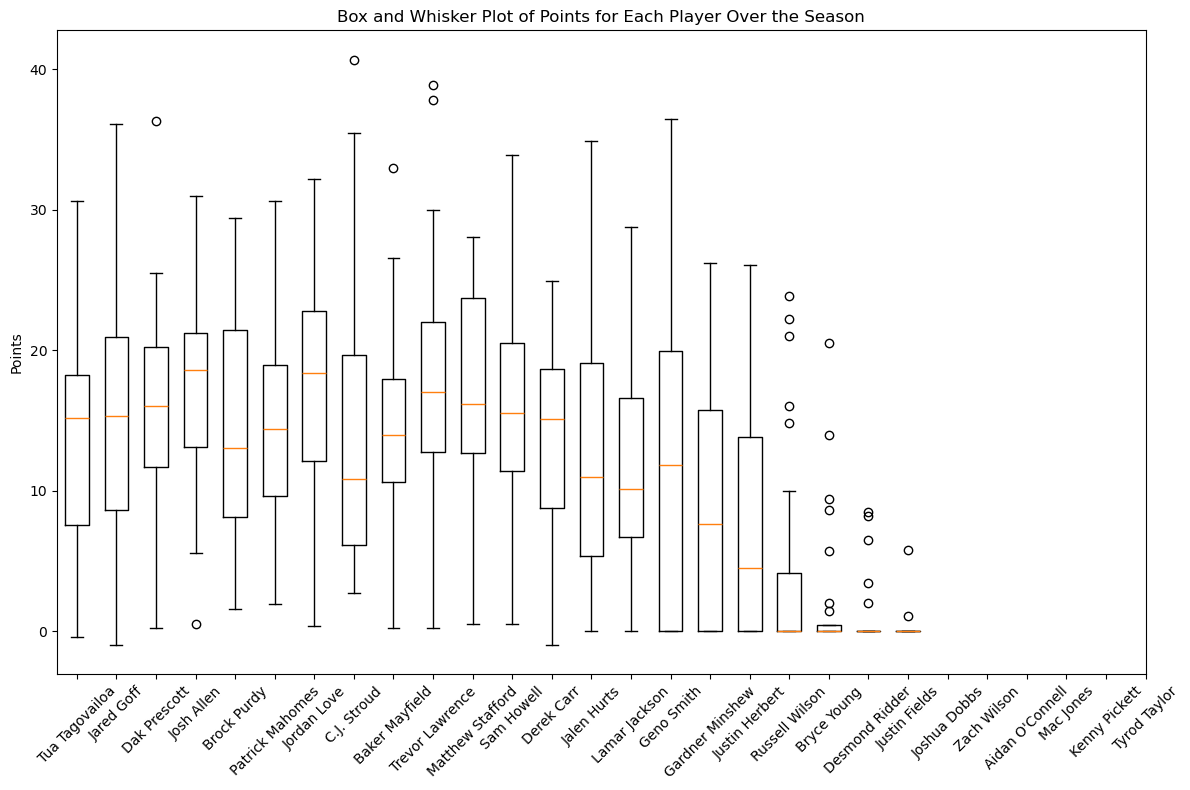

In [107]:
data_to_plot = [new_df[col].dropna().tolist() for col in new_df.columns[:-1]]

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.boxplot(data_to_plot, widths=0.6)  # Adjust 'widths' to change the box width

player_names = new_df.index.tolist()  # Get player names from the DataFrame index
plt.xticks(range(1, len(player_names) + 1), player_names, rotation=45)  # Set x-ticks labels to player names
plt.ylabel('Points')
plt.title('Box and Whisker Plot of Points for Each Player Over the Season')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

In [91]:
all_players_df.T['AVG'] = all_players_df[0:17].mean()

Text(0.5, 1.0, '2023 NFL Season: QBs Weekly Points')

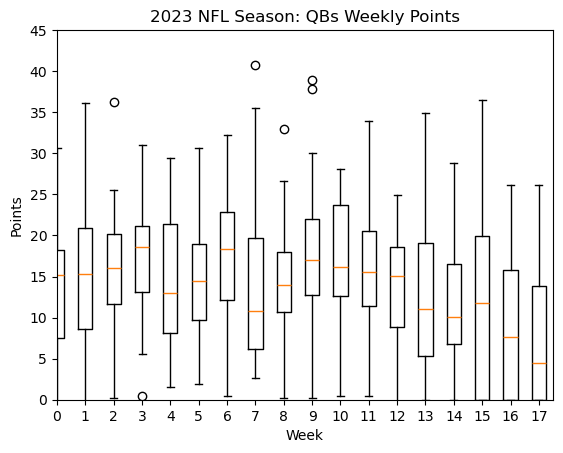

In [77]:
plt.boxplot(all_players_df.loc[0:23].T, positions=all_players_df.index)
plt.xlim(0, 17.5)
plt.ylim(0, 45)
plt.xlabel('Week')
plt.ylabel('Points')
plt.title('2023 NFL Season: QBs Weekly Points')

Text(0.5, 1.0, '2023 NFL Season: QBs Weekly Points')

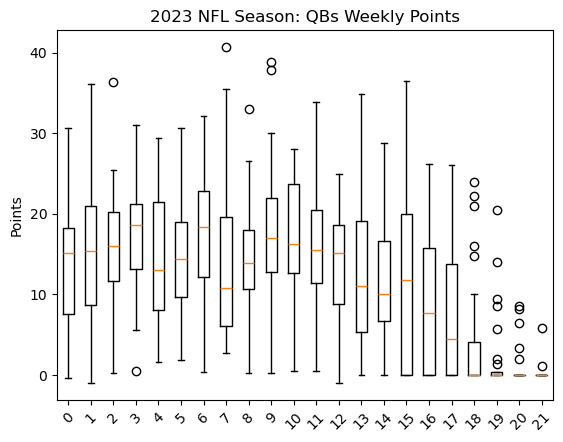

In [78]:
# Transpose the DataFrame to have players as columns
data_to_plot = all_players_df.T

# Create a boxplot for each player
plt.boxplot(data_to_plot, labels=data_to_plot.columns)

plt.xticks(rotation=45)  # Rotate player names for better readability
plt.ylabel('Points')
plt.title('2023 NFL Season: QBs Weekly Points')

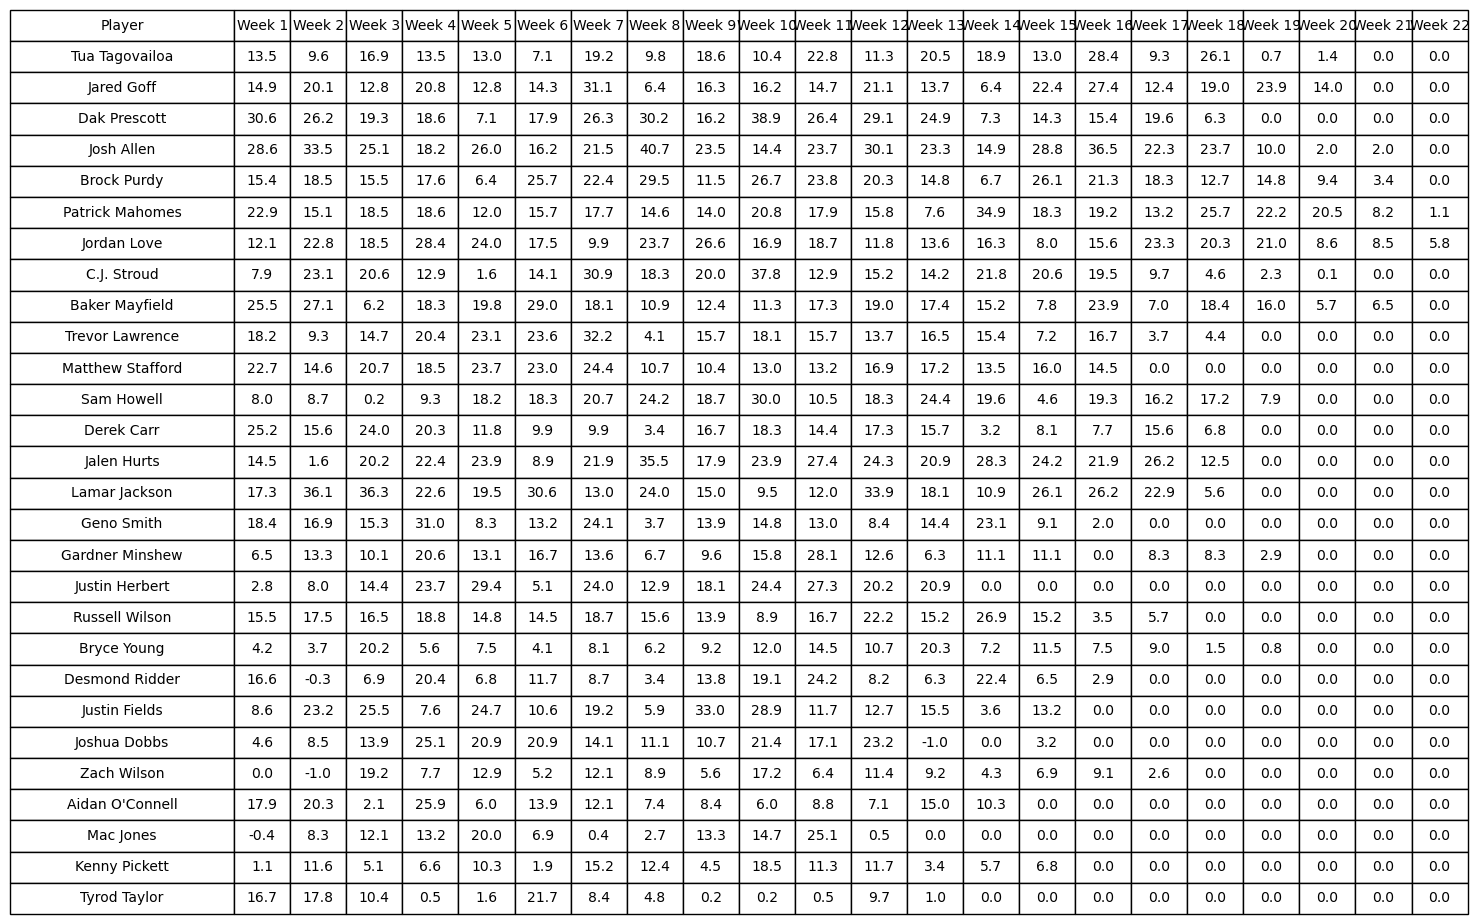

In [58]:
transposed_df = all_players_df.transpose()
transposed_df.replace(np.nan, 0, inplace=True)

fig, ax = plt.subplots(figsize=(15, 10))  # Increase the figure size
ax.axis('tight')
ax.axis('off')

# Prepare the table data
table_data = transposed_df.reset_index().values.tolist()  # Convert the transposed DataFrame to a list of lists
column_labels = ['Player'] + [f'Week {i}' for i in range(1, len(transposed_df.columns) + 1)]  # Create column labels with 'Player' and weeks

# Create the table
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size as needed
table.scale(1.2, 1.2)  # Adjust scaling as needed to fit the figure

# Adjust column widths and row heights
for (i, j), cell in table.get_celld().items():
    if j == 0:  # "Player" column
        cell.set_width(0.2)  # Increase width for player names
    else:
        cell.set_width(0.05)  # Decrease width for week columns
    cell.set_height(0.05)  # Adjust height for all rows
 # Add a title to the table
plt.tight_layout()
plt.show()

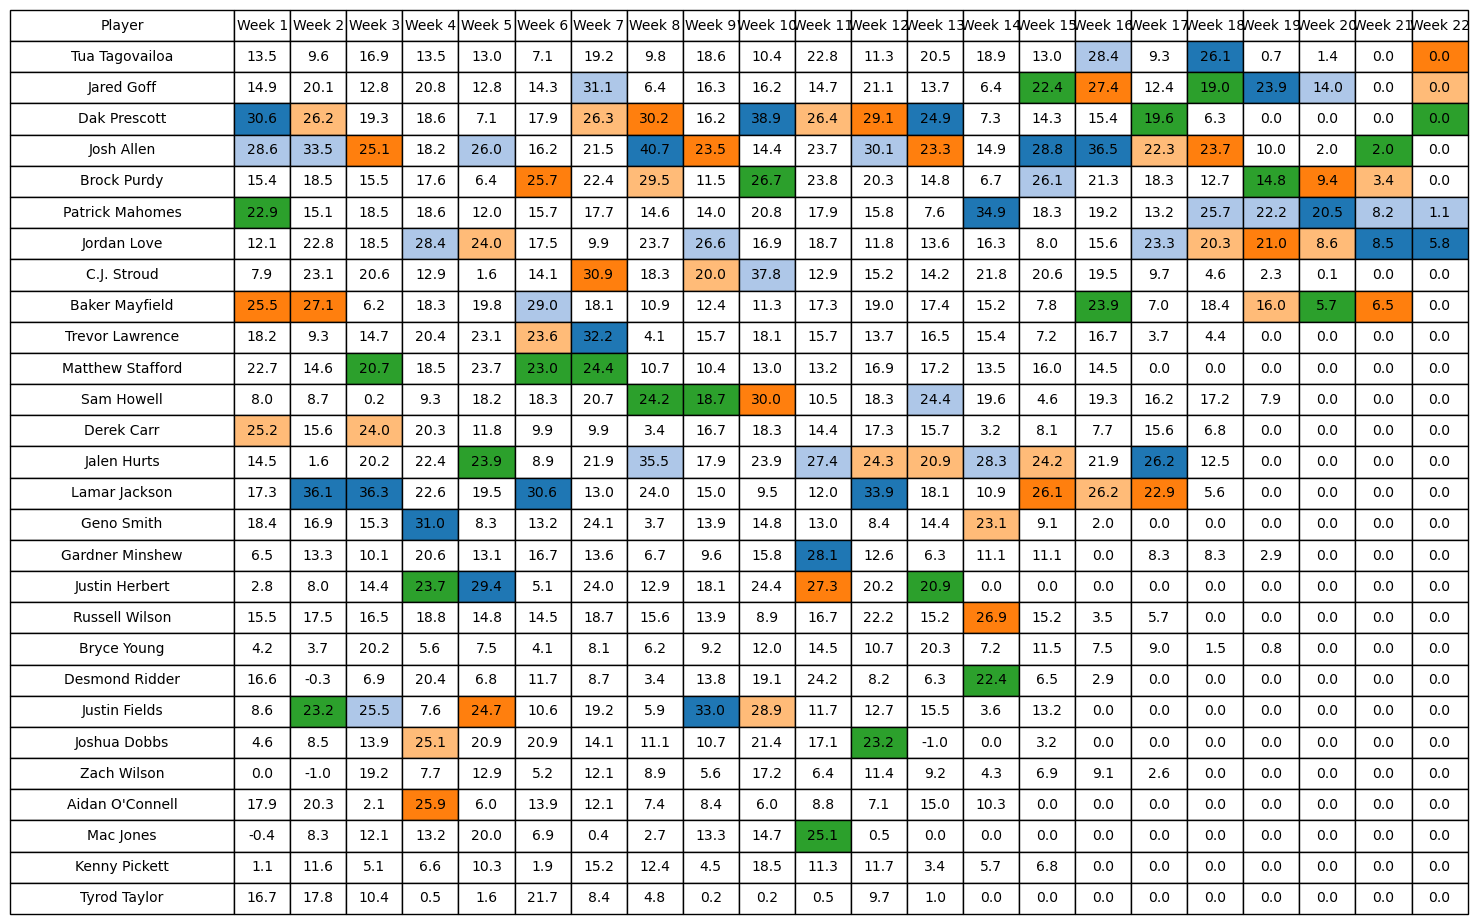

In [45]:
transposed_df = all_players_df.transpose()
transposed_df.replace(np.nan, 0, inplace=True)

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(15, 10))  # Increase the figure size
ax.axis('tight')
ax.axis('off')

# Prepare the table data
table_data = transposed_df.reset_index().values.tolist()  # Convert the transposed DataFrame to a list of lists
column_labels = ['Player'] + [f'Week {i}' for i in range(1, len(transposed_df.columns) + 1)]  # Create column labels with 'Player' and weeks

# Determine the top 5 QBs for each week based on points
top_5_per_week = {}
for week in transposed_df.columns:
    top_5_qbs = transposed_df[week].nlargest(5).index
    top_5_per_week[week] = top_5_qbs

# Create the table
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')

# Define a color map
cmap = plt.get_cmap("tab20")

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size as needed
table.scale(1.2, 1.2)  # Adjust scaling as needed to fit the figure

# Adjust column widths and row heights
for (i, j), cell in table.get_celld().items():
    if j == 0:  # "Player" column
        cell.set_width(0.2)  # Increase width for player names
    else:
        cell.set_width(0.05)  # Decrease width for week columns
    cell.set_height(0.05)  # Adjust height for all rows
    
    # Color code the top 5 QBs
    if j > 0 and i > 0:  # Skip the header row and column
        week = transposed_df.columns[j - 1]  # Get the week name from the columns
        player = transposed_df.index[i - 1]  # Get the player name from the index
        if player in top_5_per_week[week]:
            cell.set_facecolor(cmap((top_5_per_week[week].tolist().index(player)) / 20))  # Use the color map to color the cell

plt.tight_layout()
plt.show()

C:\Users\Tony\AppData\Local\Temp\ipykernel_1148\1452457658.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


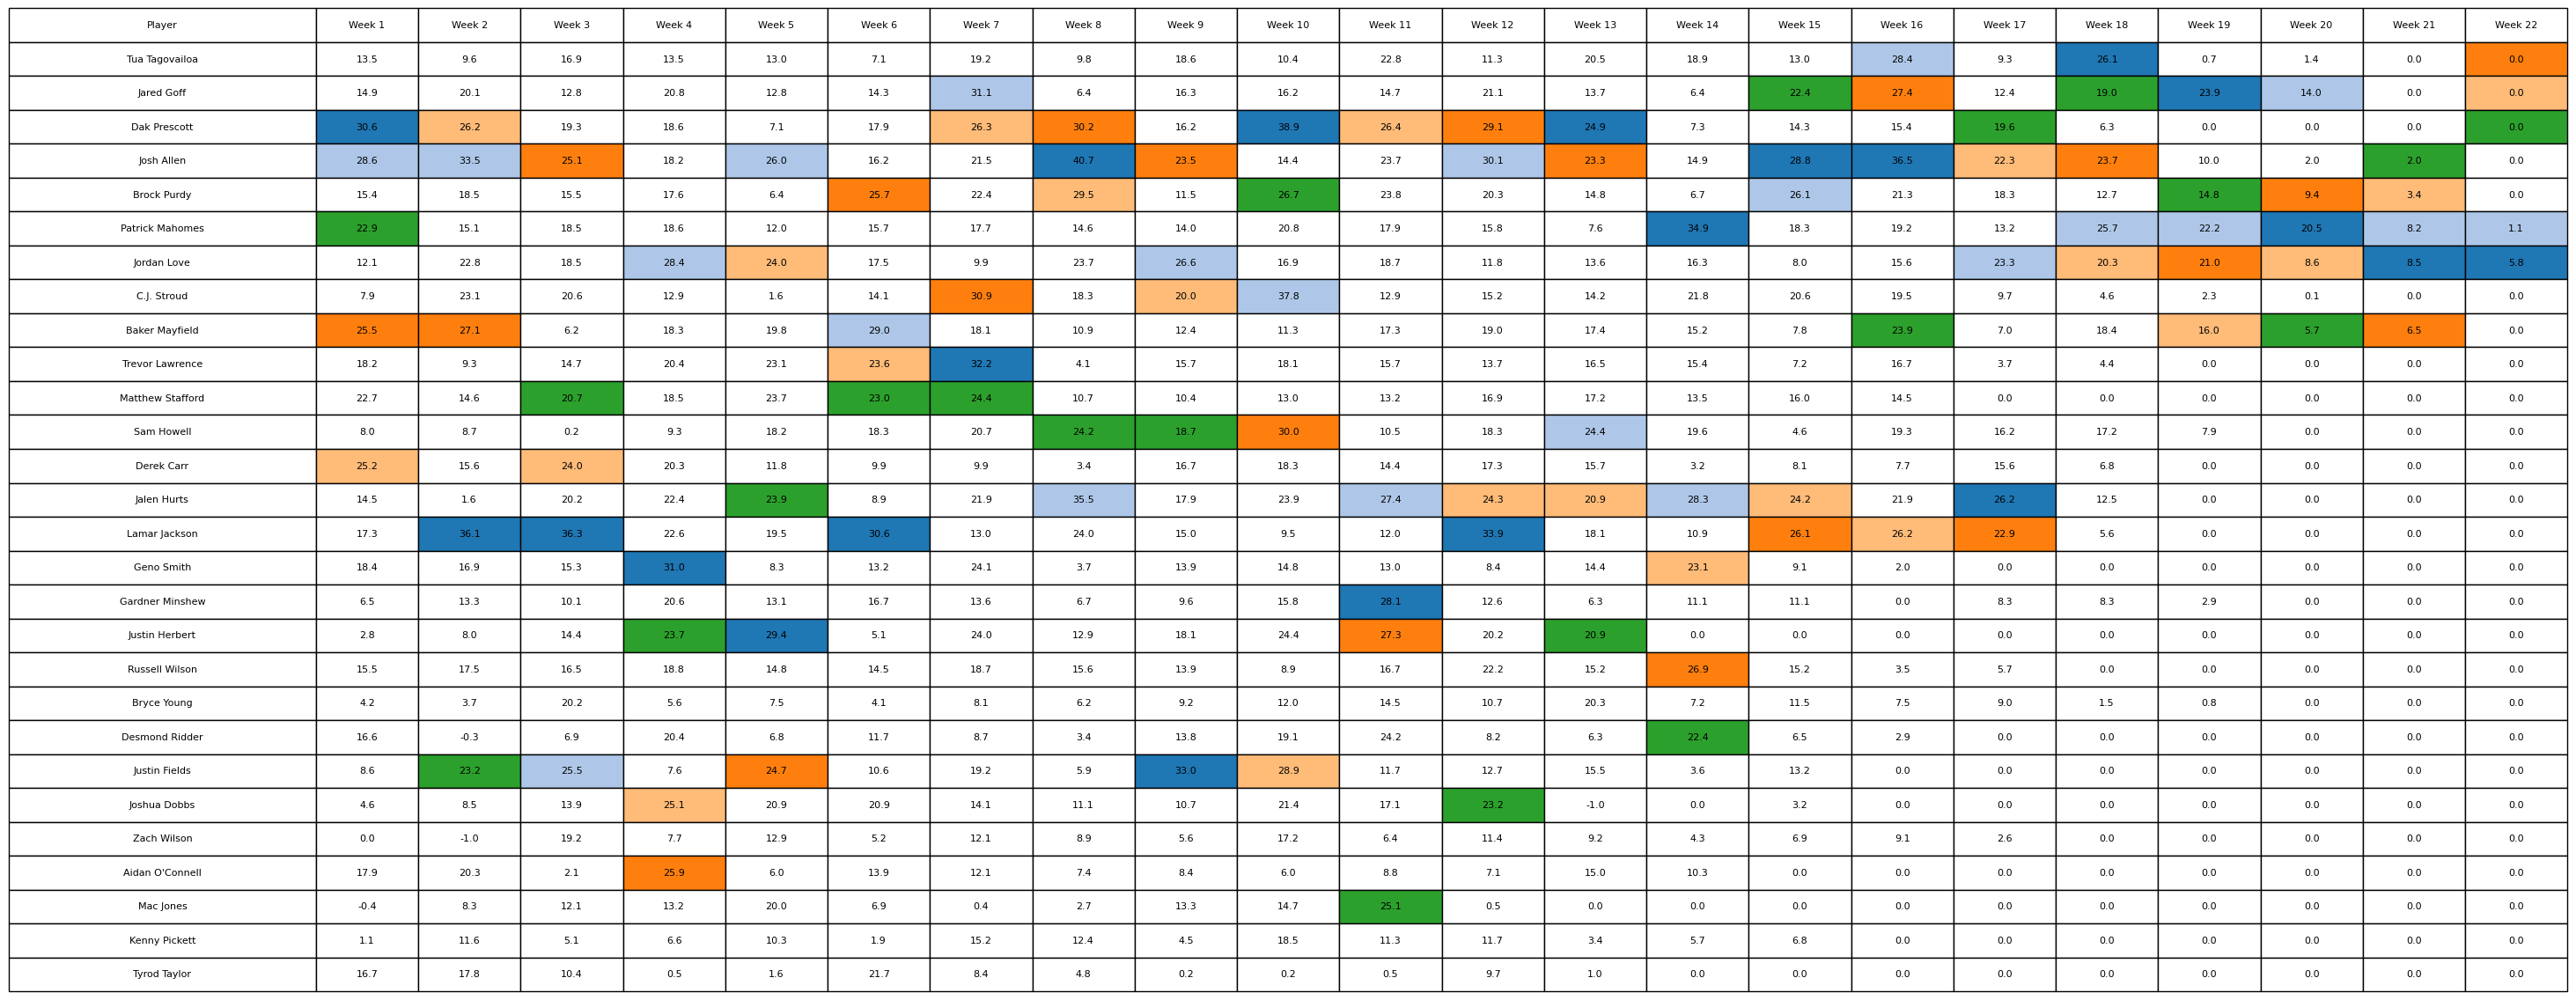

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming all_players_df is defined
# all_players_df = ... (your DataFrame with player statistics)

# Transpose the DataFrame and replace NaNs with 0
transposed_df = all_players_df.transpose()
transposed_df.replace(np.nan, 0, inplace=True)

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(15, 10))  # Increase the figure size
ax.axis('tight')
ax.axis('off')

# Prepare the table data
table_data = transposed_df.reset_index().values.tolist()  # Convert the transposed DataFrame to a list of lists
column_labels = ['Player'] + [f'Week {i}' for i in range(1, len(transposed_df.columns) + 1)]  # Create column labels with 'Player' and weeks

# Determine the top 5 QBs for each week based on points
top_5_per_week = {}
for week in transposed_df.columns:
    top_5_qbs = transposed_df[week].nlargest(5).index
    top_5_per_week[week] = top_5_qbs

# Create the table
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')

# Define a color map
cmap = plt.get_cmap("tab20")

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size as needed
table.scale(1.2, 1.2)  # Adjust scaling as needed to fit the figure

# Adjust column widths and row heights
for (i, j), cell in table.get_celld().items():
    if j == 0:  # "Player" column
        cell.set_width(0.3)  # Increase width for player names
    else:
        cell.set_width(0.1)  # Decrease width for week columns
    cell.set_height(0.05)  # Adjust height for all rows
    
    # Color code the top 5 QBs
    if j > 0 and i > 0:  # Skip the header row and column
        week = transposed_df.columns[j - 1]  # Get the week name from the columns
        player = transposed_df.index[i - 1]  # Get the player name from the index
        if player in top_5_per_week[week]:
            cell.set_facecolor(cmap((top_5_per_week[week].tolist().index(player)) / 20))  # Use the color map to color the cell

plt.tight_layout()
plt.show()


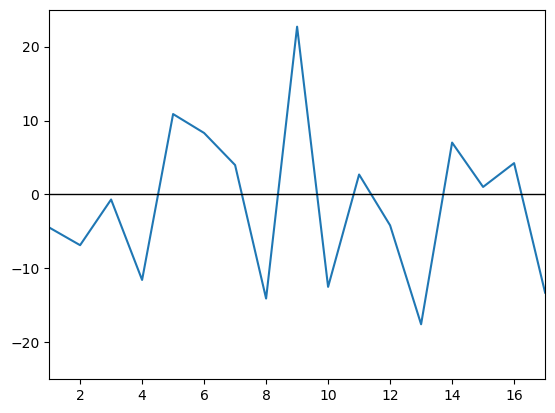

In [ ]:
plt.plot(dak_data.index, dak_data['RoC'])
plt.xlim(1, 17)
plt.ylim(-25, 25)
plt.axhline(0, color='black', linestyle='-', linewidth=1)